**Sentiment Analysis with Naive Bayes**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Load data

In [ ]:
from google.colab import files

# Upload file CSV
uploaded = files.upload()

Saving INA_TweetsPPKM_Labeled_Pure.csv to INA_TweetsPPKM_Labeled_Pure.csv


In [1]:
import pandas as pd

# Ganti nama file sesuai dengan nama file yang diunggah
file_name = 'INA_TweetsPPKM_Labeled_Pure.csv'

# Membaca dataset ke dalam DataFrame dengan pembatas kolom '\t'
df = pd.read_csv(file_name, sep='\t')


NameError: name 'read_csv' is not defined

# 2. Ekplorasi Data

In [ ]:
# Melihat 5 baris pertama dataset
print(df.head())
print()

# Melihat info dataset
print(df.info())
print()

# Melihat distribusi label sentimen
print(df['sentiment'].value_counts())


                        Date           User  \
0  2022-03-31 14:32:04+00:00  pikobar_jabar   
1  2022-03-31 09:26:00+00:00     inewsdotid   
2  2022-03-31 05:02:34+00:00      vdvc_talk   
3  2022-03-30 14:23:10+00:00  pikobar_jabar   
4  2022-03-30 11:28:57+00:00      tvOneNews   

                                               Tweet  sentiment  
0  Ketahui informasi pembagian #PPKM di wilayah J...          1  
1  Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...          1  
2  Juru bicara Satgas Covid-19, Wiku Adisasmito m...          1  
3  Ketahui informasi pembagian #PPKM di wilayah J...          1  
4  Kementerian Agama menerbitkan Surat Edaran Nom...          1  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23644 entries, 0 to 23643
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23644 non-null  object
 1   User       23644 non-null  object
 2   Tweet      23644 non-null  object
 3   sentiment  2

<ipython-input-5-34cabf398d93>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentimen_counts.index, y=sentimen_counts.values, palette='pastel')


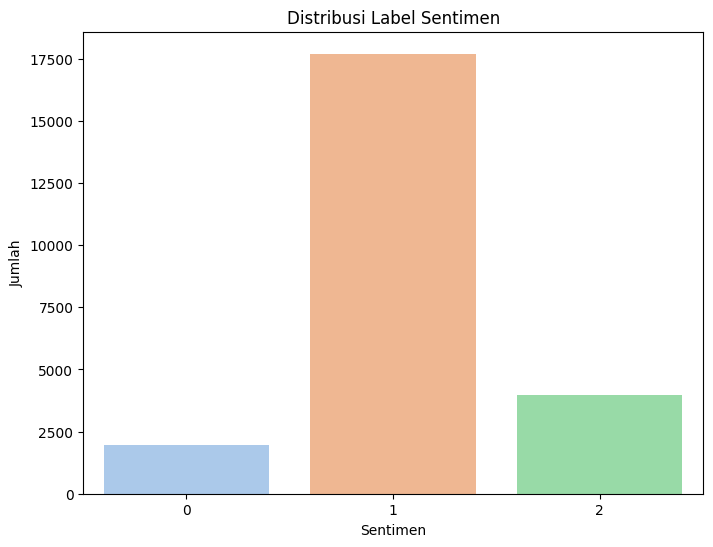

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.DataFrame(df)

# Melihat distribusi label sentimen
sentimen_counts = data['sentiment'].value_counts()

# Membuat visualisasi dengan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=sentimen_counts.index, y=sentimen_counts.values, palette='pastel')
plt.title('Distribusi Label Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()


# 3. Preprocessing Data

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# Coba panggil stopwords untuk bahasa Indonesia
stop_words = stopwords.words('indonesian')
print(stop_words)


['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Unduh modul "stopwords" jika belum diunduh
import nltk
nltk.download('stopwords')

# Fungsi preprocessing teks
def preprocess_text(text):
    text = text.lower()  # Ubah teks menjadi lowercase
    text = re.sub(r'\W', ' ', text)  # Hapus karakter non-word
    text = re.sub(r'\s+', ' ', text)  # Hapus spasi berlebih
    stop_words = set(stopwords.words('indonesian'))  # Mengambil daftar stopwords bahasa Indonesia
    text = ' '.join(word for word in word_tokenize(text) if word not in stop_words)  # Tokenisasi dan hapus stopwords
    return text

# Preprocessing teks pada kolom 'Tweet'
df['tweet_cleaned'] = df['Tweet'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Menampilkan beberapa contoh dari kolom 'tweet_cleaned'
print(df['tweet_cleaned'].head())


0    ketahui informasi pembagian ppkm wilayah jabar...
1    ibadah wilayah ppkm level 1 berkapasitas 100 p...
2    juru bicara satgas covid 19 wiku adisasmito bu...
3    ketahui informasi pembagian ppkm wilayah jabar...
4    kementerian agama menerbitkan surat edaran nom...
Name: tweet_cleaned, dtype: object


# 4. Pembagian Data

In [ ]:
from sklearn.model_selection import train_test_split
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(df['tweet_cleaned'], df['sentiment'], test_size=0.2, random_state=42)


In [ ]:
# Menampilkan contoh output dari data latih (y_train)
print("Contoh output dari data latih (y_train):")
print(y_train.head())

# Menampilkan contoh output dari data uji (y_test)
print("\nContoh output dari data uji (y_test):")
print(y_test.head())


Contoh output dari data latih (y_train):
13083    1
399      1
7113     1
6550     1
20843    1
Name: sentiment, dtype: int64

Contoh output dari data uji (y_test):
447      1
22822    1
12020    2
5638     1
10718    0
Name: sentiment, dtype: int64


# 5. Implementasi Naive Bayes

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi CountVectorizer
vectorizer = CountVectorizer()

# Ubah teks menjadi representasi vektor
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Inisialisasi dan latih model Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Prediksi sentimen pada data uji
y_pred = nb_classifier.predict(X_test_vectorized)


In [ ]:
# Menampilkan hasil prediksi
print("Hasil prediksi dari model Naive Bayes:")
print(y_pred)

Hasil prediksi dari model Naive Bayes:
[1 1 2 ... 1 2 2]


# 6. Accuracy

In [ ]:
# Evaluasi performa model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.850285472615775
              precision    recall  f1-score   support

           0       0.55      0.34      0.42       377
           1       0.90      0.93      0.92      3569
           2       0.70      0.73      0.72       783

    accuracy                           0.85      4729
   macro avg       0.72      0.67      0.68      4729
weighted avg       0.84      0.85      0.84      4729



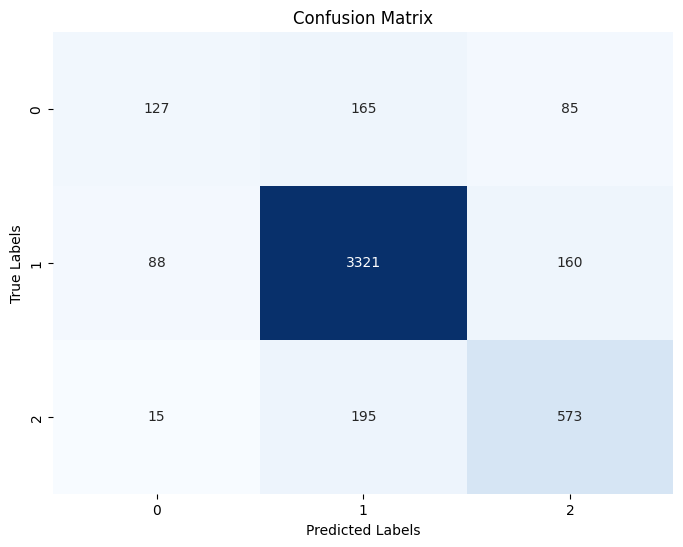

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#EKSPERIMEN UNTUK MENCARI SETTING PARAMETER

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

def run_experiment(alpha_value, X_train, y_train, X_test, y_test):
    # Inisialisasi model Naive Bayes dengan alpha tertentu
    nb_classifier = MultinomialNB(alpha=alpha_value)

    # Latih model pada data latih
    nb_classifier.fit(X_train, y_train)

    # Prediksi sentimen pada data uji
    y_pred = nb_classifier.predict(X_test)

    # Evaluasi performa model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, report


In [ ]:
import numpy as np

# Definisikan rentang nilai alpha yang akan dieksplorasi
alpha_values = np.linspace(0.1, 1.0, 10)

# Lakukan eksperimen untuk setiap nilai alpha
results = []
for alpha in alpha_values:
    acc, rep = run_experiment(alpha, X_train_vectorized, y_train, X_test_vectorized, y_test)
    results.append((alpha, acc, rep))


In [ ]:
# Cetak hasil eksperimen untuk setiap nilai alpha
for result in results:
    print(f"Alpha: {result[0]}, Accuracy: {result[1]}")
    print(result[2])
    print("===================")

# Pilih nilai alpha dengan performa terbaik
best_alpha = max(results, key=lambda x: x[1])[0]
print(f"Best Alpha: {best_alpha}")


Alpha: 0.1, Accuracy: 0.8301966589130895
              precision    recall  f1-score   support

           0       0.46      0.54      0.50       377
           1       0.94      0.87      0.90      3569
           2       0.63      0.80      0.71       783

    accuracy                           0.83      4729
   macro avg       0.68      0.74      0.70      4729
weighted avg       0.85      0.83      0.84      4729

Alpha: 0.2, Accuracy: 0.8331571156692746
              precision    recall  f1-score   support

           0       0.48      0.52      0.50       377
           1       0.94      0.87      0.90      3569
           2       0.63      0.80      0.70       783

    accuracy                           0.83      4729
   macro avg       0.68      0.73      0.70      4729
weighted avg       0.85      0.83      0.84      4729

Alpha: 0.30000000000000004, Accuracy: 0.8380207231972933
              precision    recall  f1-score   support

           0       0.50      0.49      0.49 

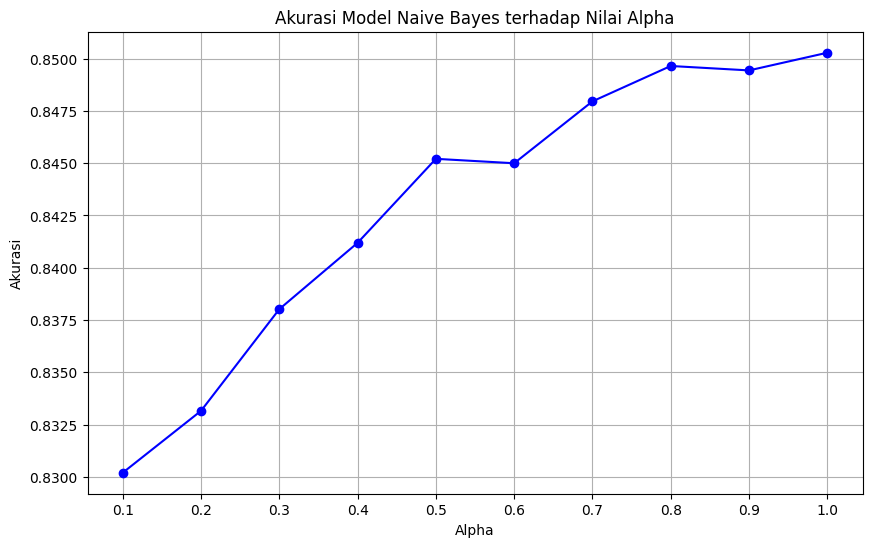

In [ ]:
import matplotlib.pyplot as plt

# Daftar nilai alpha dan akurasi
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
accuracies = [0.8301966589130895, 0.8331571156692746, 0.8380207231972933, 0.8411926411503489,
              0.845210403890886, 0.8449989426940157, 0.8479593994502009, 0.8496510890251638,
              0.8494396278282935, 0.850285472615775]

# Plot grafik akurasi terhadap nilai alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Akurasi Model Naive Bayes terhadap Nilai Alpha')
plt.xlabel('Alpha')
plt.ylabel('Akurasi')
plt.xticks(alpha_values)
plt.grid(True)
plt.show()
